In [ ]:
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

Q1. Get the all the Aircraft in production or development at Boeing Commercial Airplanes from https://en.wikipedia.org/wiki/Boeing_Commercial_Airplanes

In [1]:
!pip install beautifulsoup4

You should consider upgrading via the '/Users/sandeepk/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
from bs4 import BeautifulSoup
import requests

response = requests.get('https://en.wikipedia.org/wiki/Boeing_Commercial_Airplanes')

In [3]:
print(response)

<Response [200]>


In [4]:
print(response.__dict__.keys())

dict_keys(['_content', '_content_consumed', '_next', 'status_code', 'headers', 'raw', 'url', 'encoding', 'history', 'reason', 'cookies', 'elapsed', 'request', 'connection'])


Status codes <br>

Check this out
https://developer.mozilla.org/en-US/docs/Web/HTTP/Status

In [6]:
print(response.status_code)

200


In [7]:
#html code
response.content #parse this data

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Boeing Commercial Airplanes - Wikipedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vec

In [9]:
soup #beautifies html code w respect to indentation

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Boeing Commercial Airplanes - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-fe

Creating a Soup

In [13]:
soup = BeautifulSoup(response.content, 'html.parser')

current_prod_table = soup.find_all(['table'])[1] #all data that starts w tag <table> --> 1st index*

#current_prod_table
print(current_prod_table.prettify())


<table class="wikitable sortable" style="text-align:center; font-size:96%;">
 <caption>
  <b>
   Product list and details
  </b>
 </caption>
 <tbody>
  <tr style="background:#069;">
   <th>
    Aircraft model
   </th>
   <th>
    Number built
    <sup class="reference" id="cite_ref-21">
     <a href="#cite_note-21">
      [21]
     </a>
    </sup>
   </th>
   <th>
    Description
   </th>
   <th>
    Capacity
   </th>
   <th>
    First flight
   </th>
   <th>
    Variants in production
   </th>
   <th>
    Out-of-production variants
   </th>
  </tr>
  <tr>
   <td align="center">
    <a href="/wiki/Boeing_737" title="Boeing 737">
     737
    </a>
   </td>
   <td>
    10,906
   </td>
   <td>
    <a href="/wiki/Twinjet" title="Twinjet">
     Twin‑engine
    </a>
    ,
    <a href="/wiki/Narrow-body_aircraft" title="Narrow-body aircraft">
     single aisle
    </a>
    ,
    <a href="/wiki/Flight_length" title="Flight length">
     short- to medium-range
    </a>
    narrow-body
   </td>


Getting the Caption

In [15]:
caption = current_prod_table.find('caption').text #title of tables
print(caption)

Product list and details



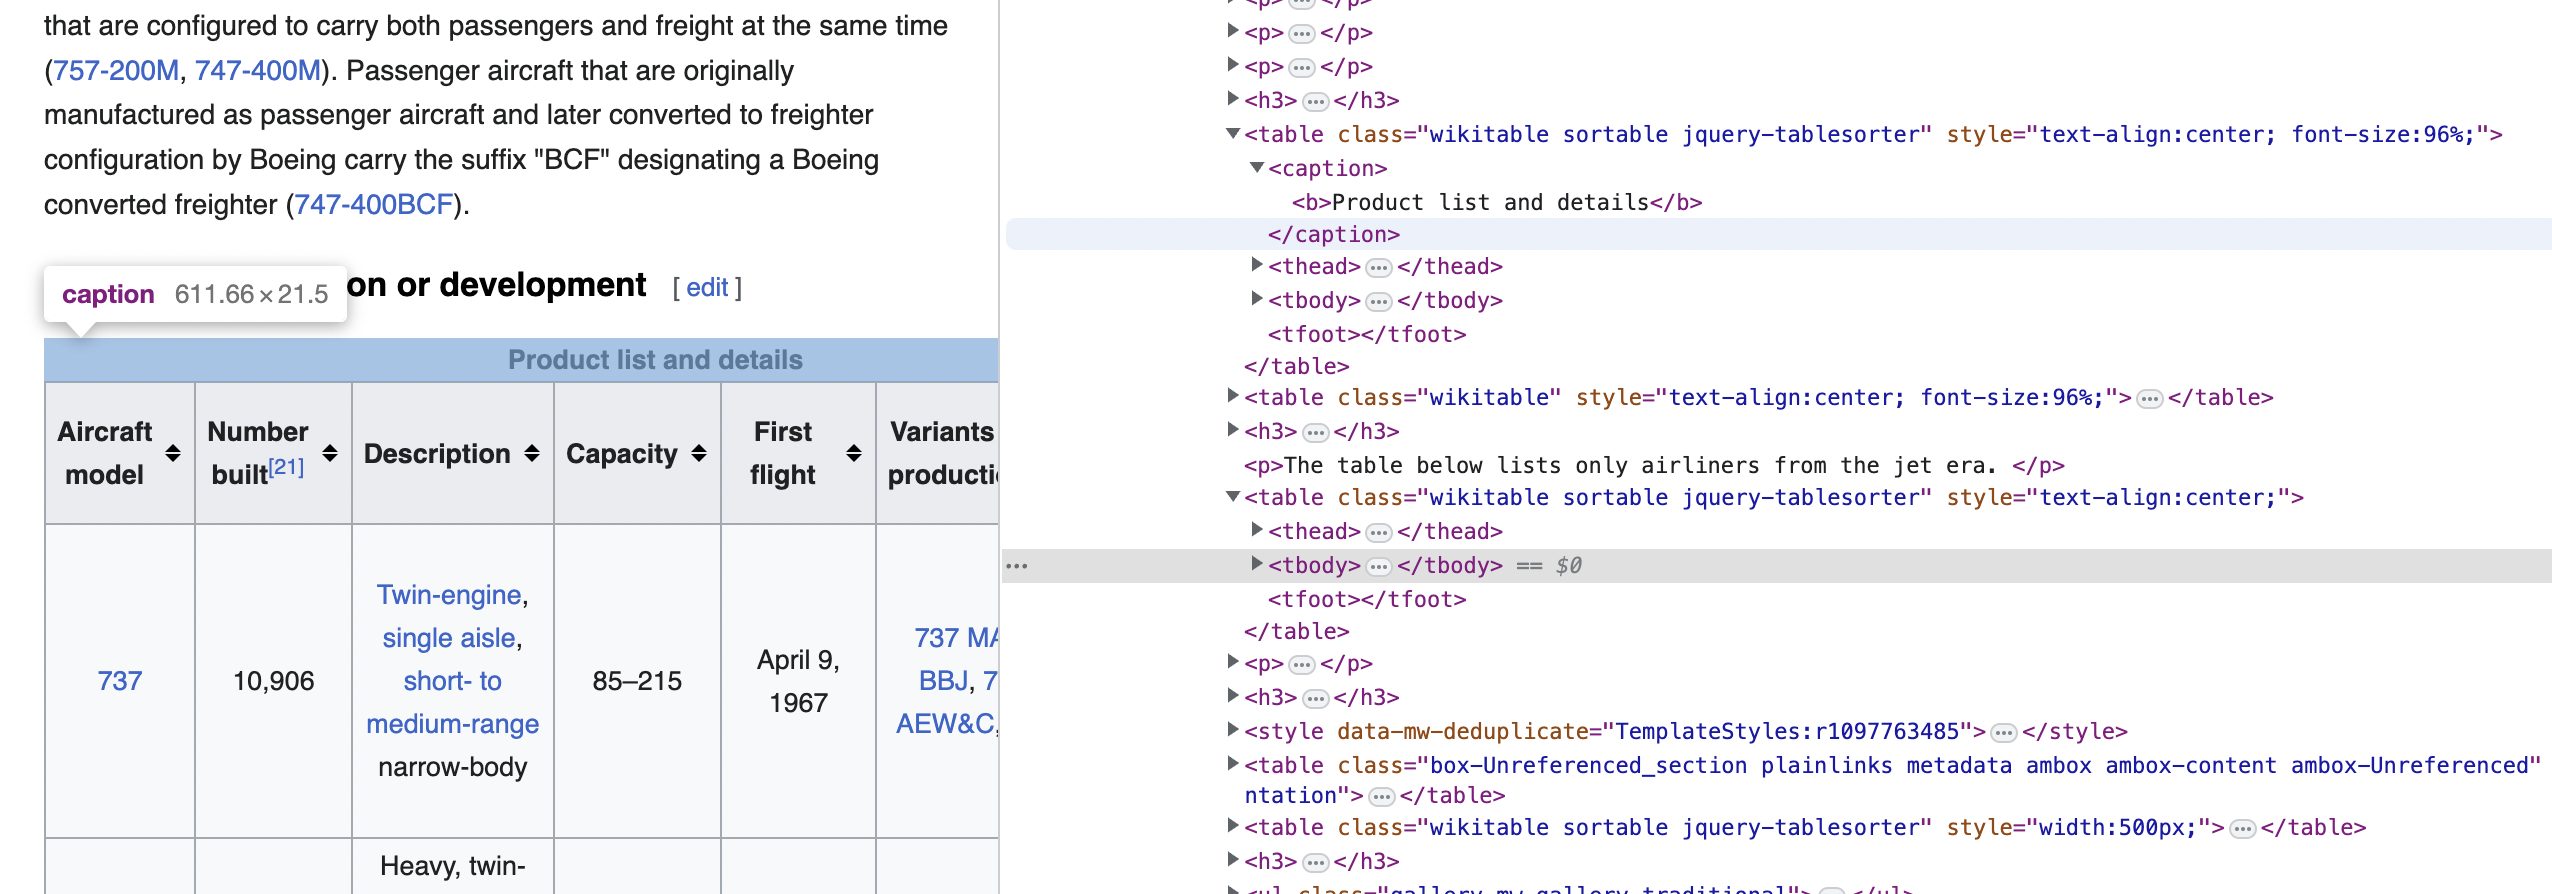

Getting the Table Column headings

In [16]:
table_headings_raw = current_prod_table.findAll('th')
table_headings = []
for heading_tag in table_headings_raw:
    table_headings.append(heading_tag.text.rstrip())
print(table_headings)

['Aircraft model', 'Number built[21]', 'Description', 'Capacity', 'First flight', 'Variants in production', 'Out-of-production variants']


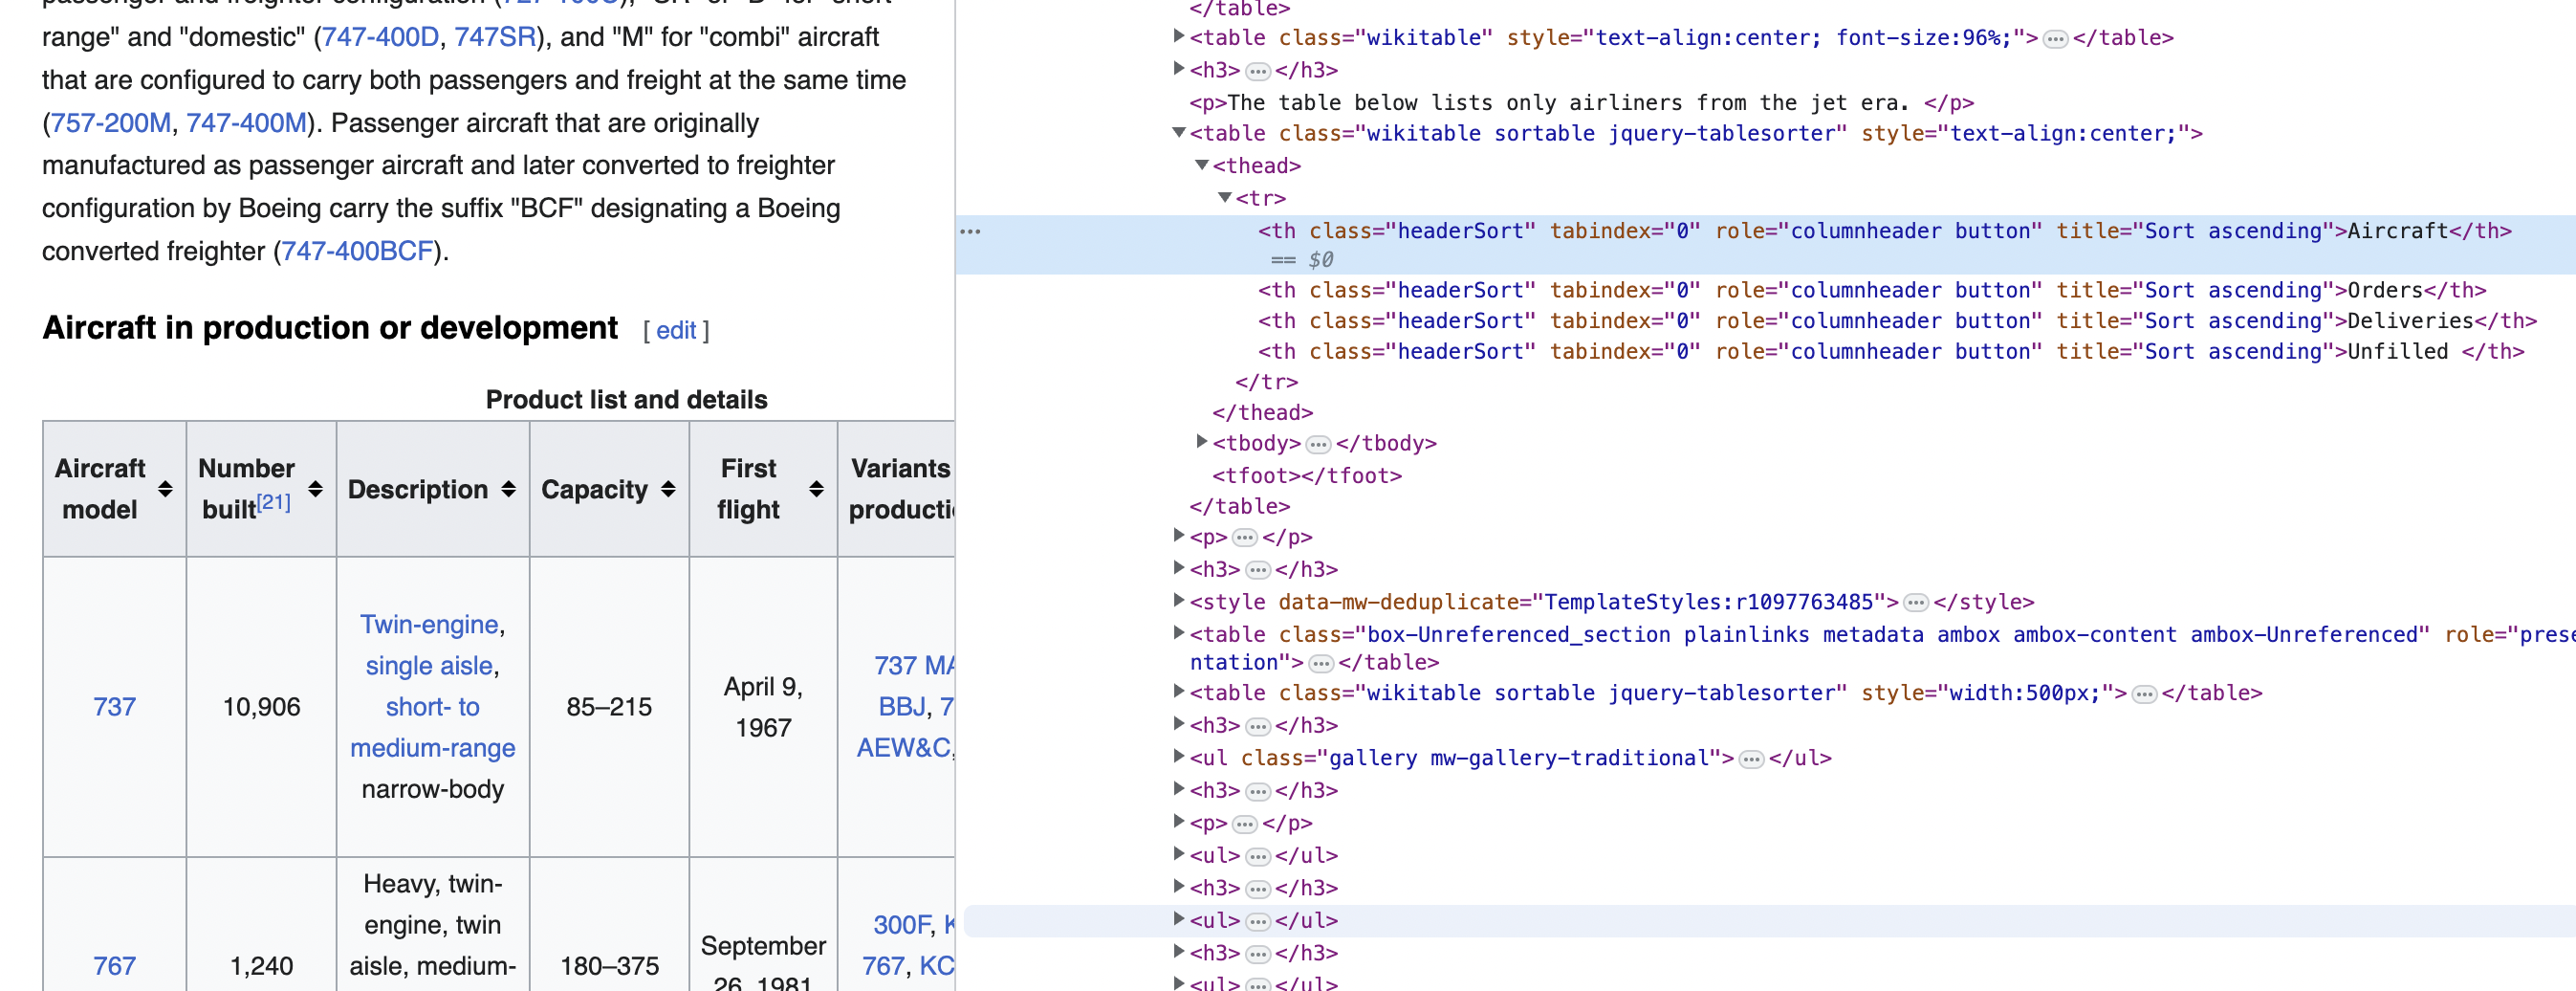

Getting data from each row

In [17]:
#the table 'tbody' has 'tr' table rows that have x amount of 'td' table data

row_data in row_data_raw.findAll('td'):
        row.append(row_data.text.rstrip())
    
    if row:
        table_content.append(row)
    
for x in table_content:
    print(x)

['737', '10,906', 'Twin‑engine, single aisle, short- to medium-range narrow-body', '85–215', 'April 9, 1967', '737 MAX, BBJ, 737 AEW&C, P-8', '100, 200, 200C/Adv, 300, 400, 500, 600, 700, 700ER, 800, 900, 900ER, C-40']
['767', '1,240', 'Heavy, twin-engine, twin aisle, medium- to long-range widebody', '180–375', 'September 26, 1981', '300F, KC-767, KC-46, E-767', '200, 200ER, 300, 300ER, 400ER[22]']
['777', '1,678', 'Heavy, twin-engine, twin aisle, medium- to long-range, ultra long-range (200LR), widebody', '301–550', 'June 12, 1994', 'BBJ, Freighter[23]', '200, 200ER, 200LR, 300, 300ER']
['787', '1,006', 'Heavy, twin-engine, twin aisle, long-range widebody', '210–330[24]', 'December 15, 2009', '8, 9,[25] 10, BBJ[26]', '']


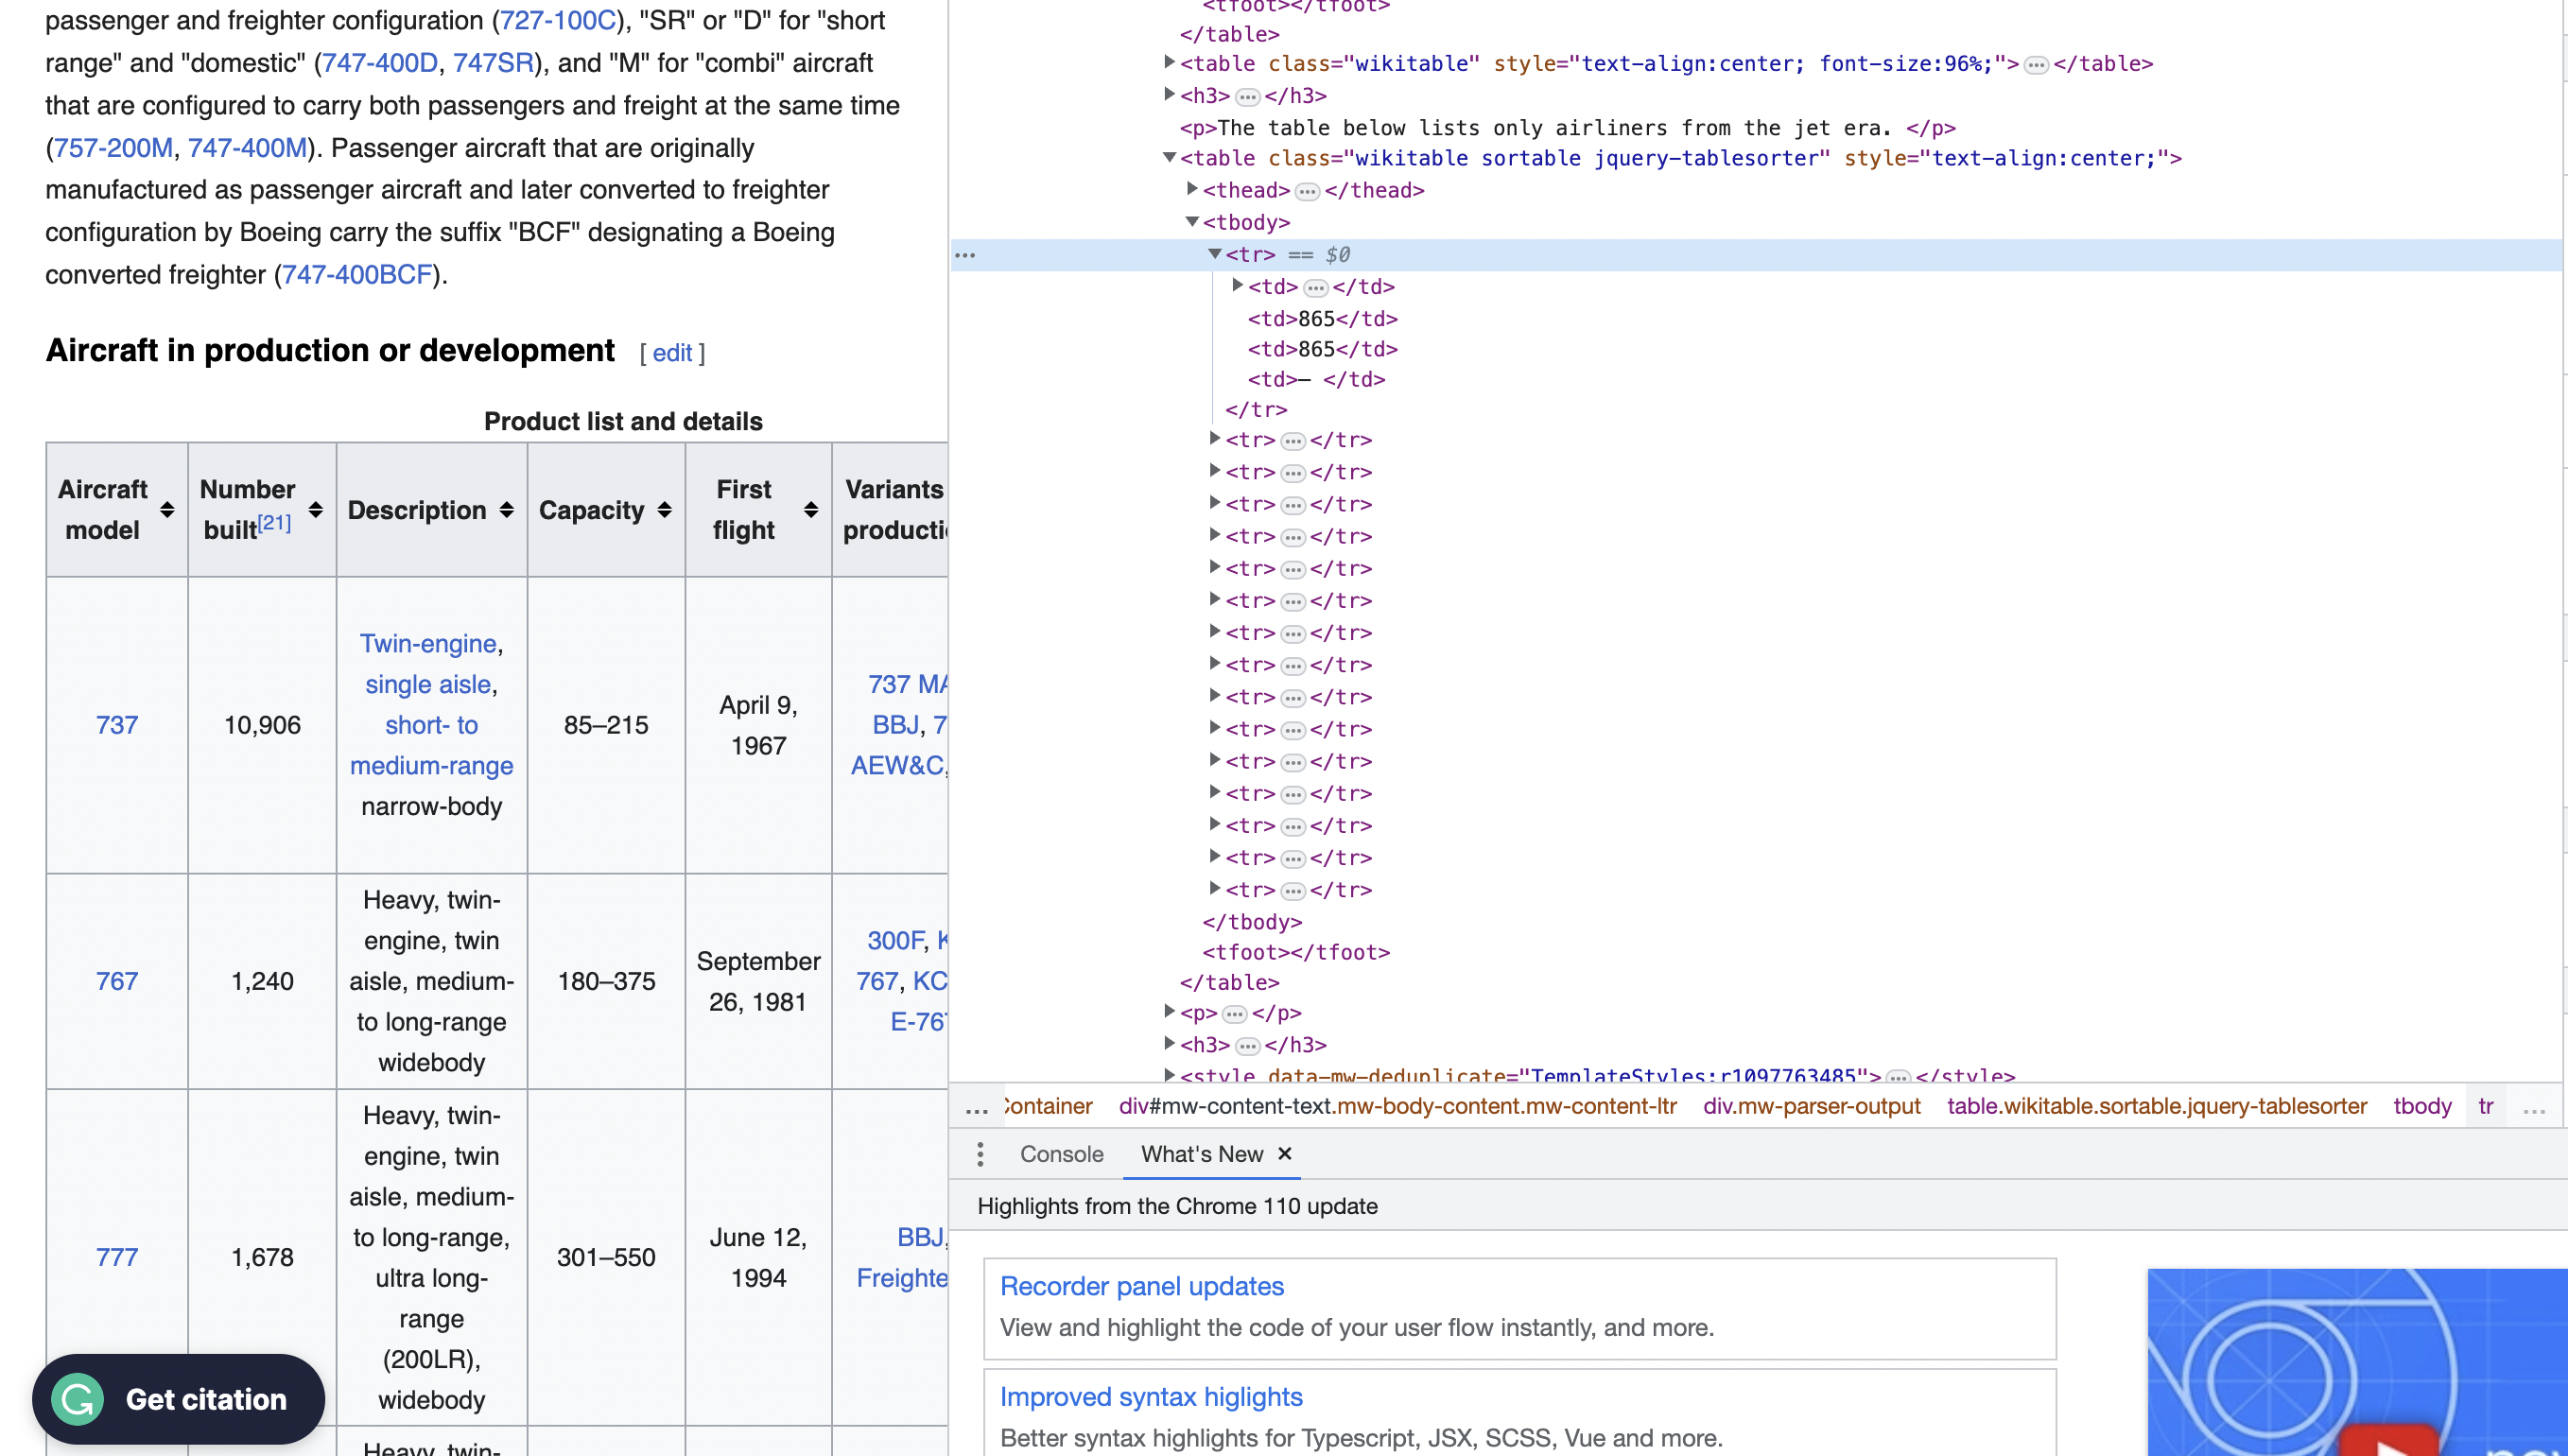

Optional: Display (using pandas)

In [ ]:
# !pip install pandas

In [18]:
import pandas as pd

df = pd.DataFrame(table_content, columns=table_headings)
df

Aircraft model Number built[21]  \
0            737           10,906   
1            767            1,240   
2            777            1,678   
3            787            1,006   

                                         Description     Capacity  \
0  Twin‑engine, single aisle, short- to medium-ra...       85–215   
1  Heavy, twin-engine, twin aisle, medium- to lon...      180–375   
2  Heavy, twin-engine, twin aisle, medium- to lon...      301–550   
3  Heavy, twin-engine, twin aisle, long-range wid...  210–330[24]   

         First flight        Variants in production  \
0       April 9, 1967  737 MAX, BBJ, 737 AEW&C, P-8   
1  September 26, 1981    300F, KC-767, KC-46, E-767   
2       June 12, 1994            BBJ, Freighter[23]   
3   December 15, 2009         8, 9,[25] 10, BBJ[26]   

                          Out-of-production variants  
0  100, 200, 200C/Adv, 300, 400, 500, 600, 700, 7...  
1                  200, 200ER, 300, 300ER, 400ER[22]  
2                      200, 200ER, 200LR, 300, 300ER  
3

Alternate way: Using pandas' read_html().

In [28]:
# df2 = pd.read_html('https://en.wikipedia.org/wiki/Boeing_Commercial_Airplanes', index_col=1)[1]
# df2

In [26]:
!pip install lxml

You should consider upgrading via the '/Users/sandeepk/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


While the pandas simplifies scarping tables, you cannot use it for your project.

Q2. Get all the images from latimes.com and save their paths. Optionally you should also be able to save those images to your local desktop.

In [29]:
response = requests.get('https://www.latimes.com/')
print(response) #BAD REQUEST :( 

<Response [403]>


In [31]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.114 Safari/537.36"
}
#SAY WE LOGGING IN FROM THIS MOZZILLA AND AGENT

response = requests.get('https://www.latimes.com/', headers=headers)
print(response)

<Response [200]>


In [1]:
from bs4 import BeautifulSoup
import requests

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.114 Safari/537.36"
}
response = requests.get('https://www.latimes.com/', headers=headers)

soup = BeautifulSoup(response.content, 'html.parser')

# print(soup.prettify())
images = soup.find_all(['img'])

image_paths = []
for image in images:
    try:
        image_paths.append(image['srcset'].split(' ')[0]) #srcet has jpeg image
    except:
        print(image.__dict__.keys())

print(f'Got {len(image_paths)} images')

dict_keys(['parser_class', 'name', 'namespace', '_namespaces', 'prefix', 'sourceline', 'sourcepos', 'known_xml', 'attrs', 'contents', 'parent', 'previous_element', 'next_element', 'next_sibling', 'previous_sibling', 'hidden', 'can_be_empty_element', 'cdata_list_attributes', 'preserve_whitespace_tags', 'interesting_string_types'])
dict_keys(['parser_class', 'name', 'namespace', '_namespaces', 'prefix', 'sourceline', 'sourcepos', 'known_xml', 'attrs', 'contents', 'parent', 'previous_element', 'next_element', 'next_sibling', 'previous_sibling', 'hidden', 'can_be_empty_element', 'cdata_list_attributes', 'preserve_whitespace_tags', 'interesting_string_types'])
Got 72 images


In [6]:
print(type(image_paths[1]))
print(image_paths[1])

<class 'str'>
https://ca-times.brightspotcdn.com/dims4/default/8a5d0e9/2147483647/strip/true/crop/3000x2000+0+131/resize/110x73!/quality/80/?url=https%3A%2F%2Fcalifornia-times-brightspot.s3.amazonaws.com%2Fe4%2F55%2Fc3d4c6bc4a2f880b853cb84da981%2Fap23071813997272-2.jpg


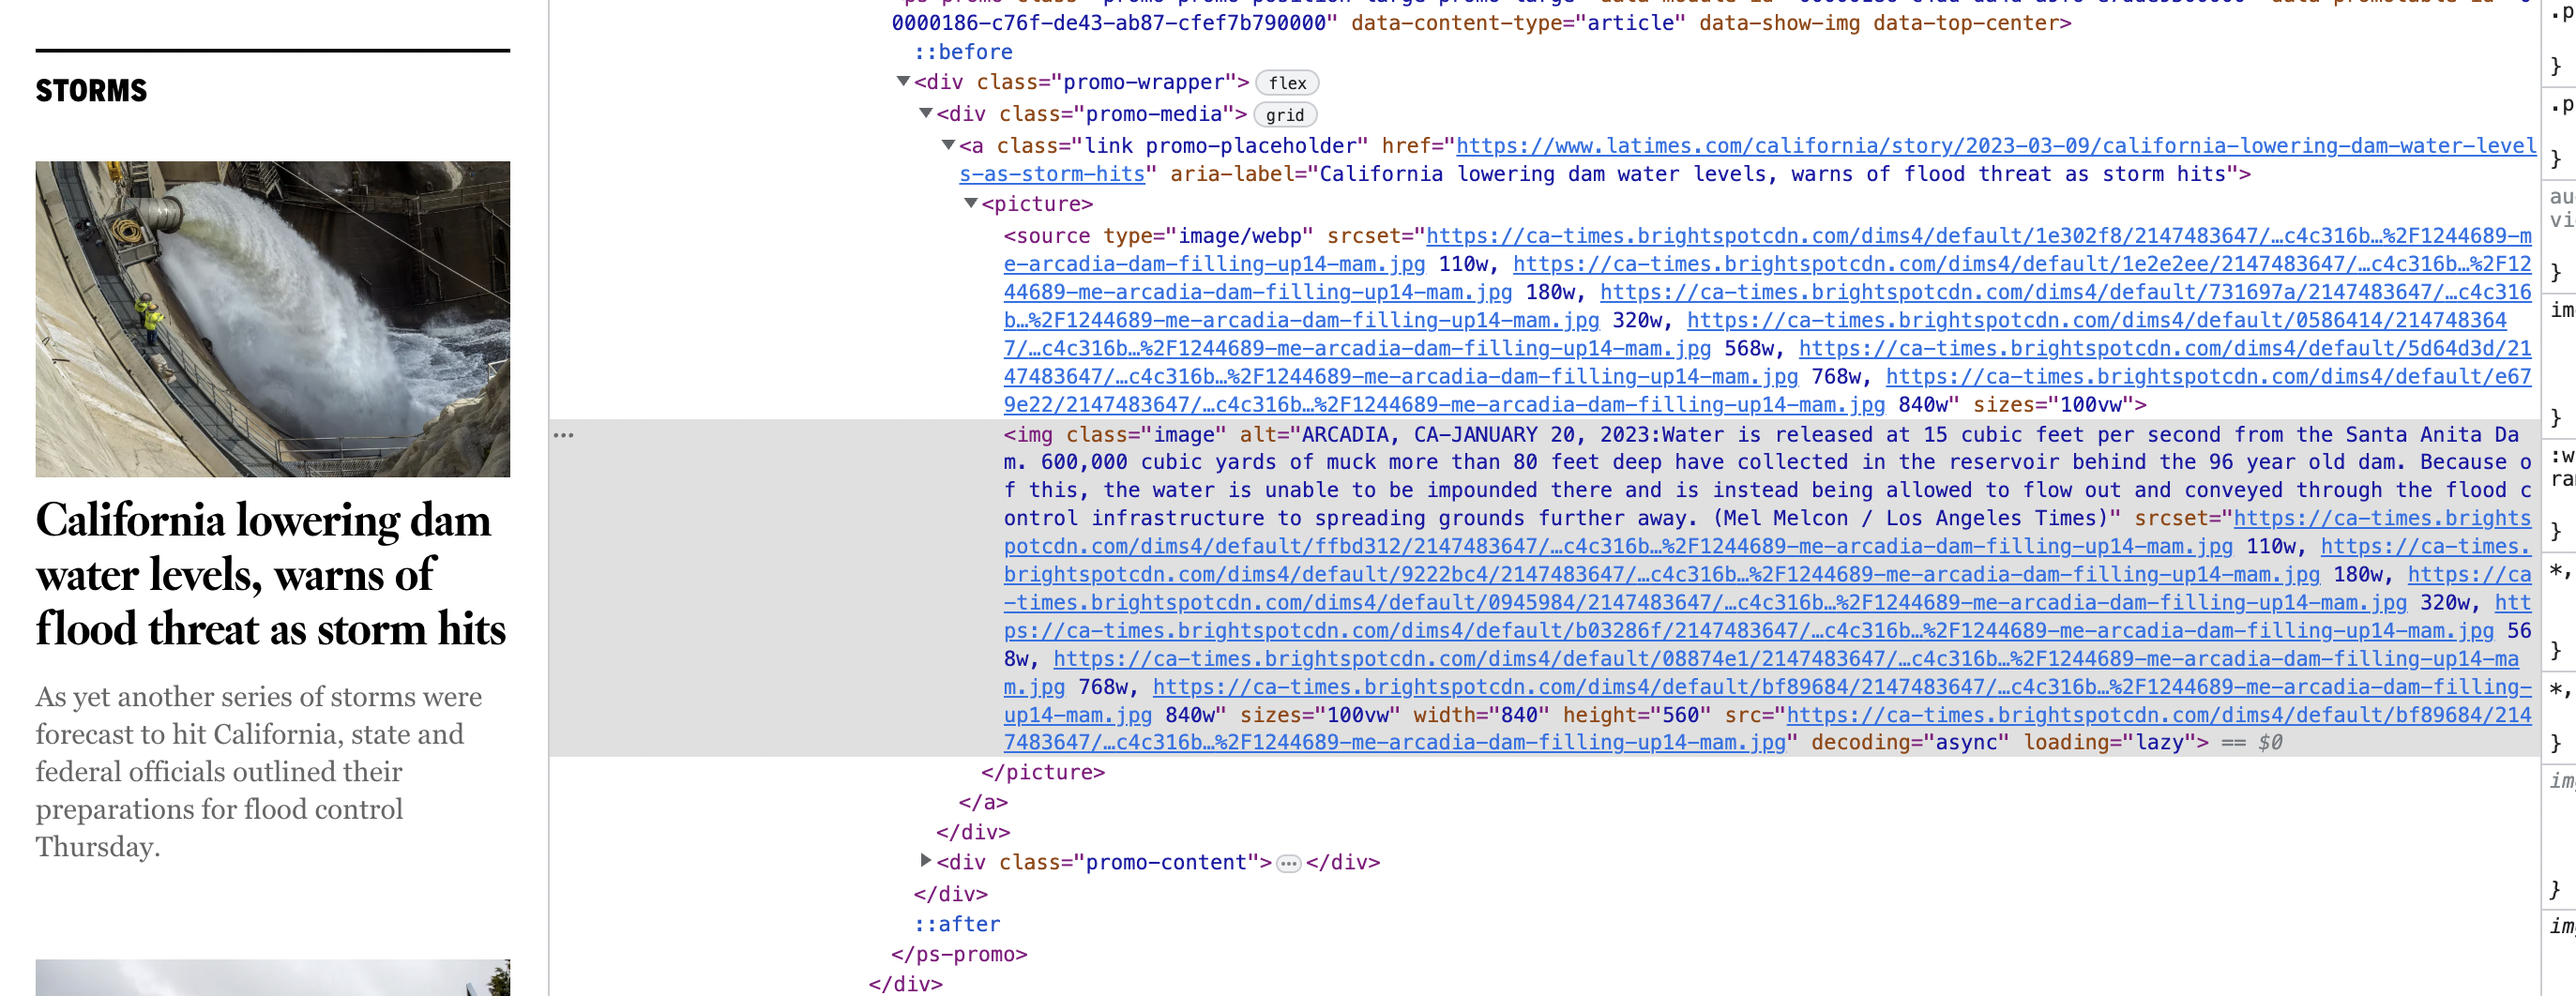

In [4]:
from IPython.display import Image
from IPython.display import display

imgs = []
for i in range(3):
  imgs.append(Image(url=image_paths[i]))

display(*imgs)


In [39]:
import urllib
# import ssl  --> for ssl error

# ssl._create_default_https_context = ssl._create_unverified_context

for index, image_path in enumerate(image_paths, start=1):
    print(f'Downloading image {index} ...')
            
    opener = urllib.request.build_opener()
    opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36')]
    urllib.request.install_opener(opener)

    urllib.request.urlretrieve(image_path, f'Image {index}.jpg')


Cool! You got a crawler in your hands now.

Q3. Given a string s, reverse the order of the words. Toggle the case of each word (i.e. if the SiEVe -> sIevE).

Words are separated by a space.

Example:

s = 'BLues is my FaVoUriTE genRE'
returns "SEUlb SI YM etIRuOvAf erNEG:

In [ ]:
def reverse(s):
    left, right = 0, len(s)-1
    while left < right:
        s[left], s[right] = s[right], s[left]
        left += 1
        right -= 1
    return s

def toggle(s):
    ans = ''
    for c in s:
        if ord('a') <= ord(c) <= ord('z'):
            ans += chr(ord('A') + ord(c) - ord('a'))
        else:
            ans += chr(ord('a') + ord(c) - ord('A'))
    return ans

def reverseWords(s):
    words = s.split(' ')
    ans = []
    for word in words:
        word = list(word)
        reversed_word = reverse(word)
        togggled_word = toggle(reversed_word)
        ans.append(''.join(togggled_word))
    return ' '.join(ans)

In [ ]:
reverseWords('BLues is my FaVoUriTE genRE')

'SEUlb SI YM etIRuOvAf erNEG'